Nama : Adil Arundaya

NIM : 5312422017

Prodi : Teknik Komputer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM)
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL)
plt.rc('legend', fontsize=FONT_MEDIUM)
plt.rc('figure', titlesize=FONT_MEDIUM)

<ipython-input-6-95cce986c73b>:17: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y1, use_line_collection=True, basefmt='C0')  # Membuat stem plot dari hasil filter


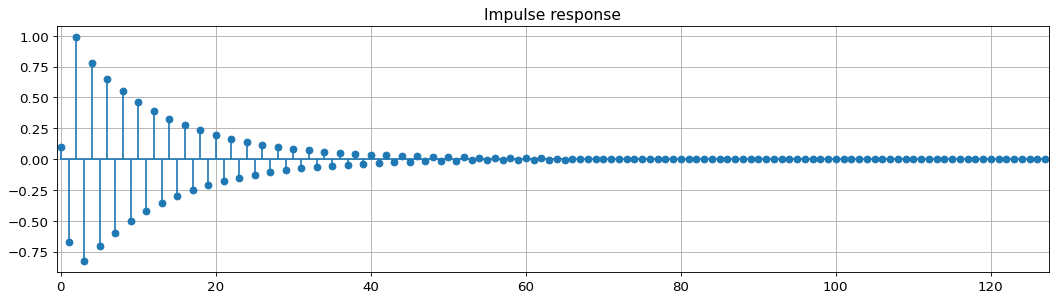

In [ ]:
N = 128  # Jumlah sampel sinyal
# Delta-function (fungsi delta)
x = np.zeros(N)  # Membuat array kosong dengan panjang N
x[0] = 1  # Menetapkan nilai 1 pada indeks ke-0, sehingga menciptakan delta function

# Input signal (sinyal masukan):
# h(z) = [b0 + b1*z^(-1) + b2*z^(-2)] / a0 + a1*z^(-1) + a2*z^(-2)
b = [0.1, -0.6, 0.5]  # Koefisien feedforward (numerator)
a = [1, 0.7, -0.2]  # Koefisien feedback (denominator)

# Memfilter sinyal input menggunakan filter linear dengan koefisien yang telah ditentukan
y1 = lfilter(b, a, x)

# Plotting hasil:
plt.figure(figsize=(16, 4), dpi=80)  # Membuat gambar dengan ukuran tertentu
plt.title('Impulse response')  # Memberi judul pada plot
plt.stem(y1, use_line_collection=True, basefmt='C0')  # Membuat stem plot dari hasil filter
plt.xlim([-0.5, N-0.5])  # Mengatur batas sumbu x
plt.grid(True)  # Menampilkan grid pada plot


Gambar tersebut menunjukkan grafik dengan judul “Respon impuls.” Pada sumbu horizontal terdapat angka dari 0 hingga 120, kemungkinan mewakili waktu atau sampel, dan sumbu vertikal berkisar antara -1,00 hingga 1,00, kemungkinan mewakili amplitudo. Terdapat titik-titik biru yang terhubung oleh garis yang dimulai dari nilai sekitar 1 pada sumbu vertikal dan dengan cepat berkurang hingga berayun di sekitar nol. Puncak awal diikuti oleh beberapa puncak dan lembah yang semakin mengecil dan akhirnya mendekati nol saat bergerak ke kanan sepanjang sumbu horizontal. Pola ini menunjukkan osilasi yang redam, yang biasanya terjadi pada respon impuls dalam pemrosesan sinyal atau sistem kontrol. Respon ini menggambarkan bagaimana sistem bereaksi terhadap perubahan eksternal yang tiba-tiba seiring waktu.

<ipython-input-7-fe3f88d33fb5>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(taps, use_line_collection=True, basefmt='C0')


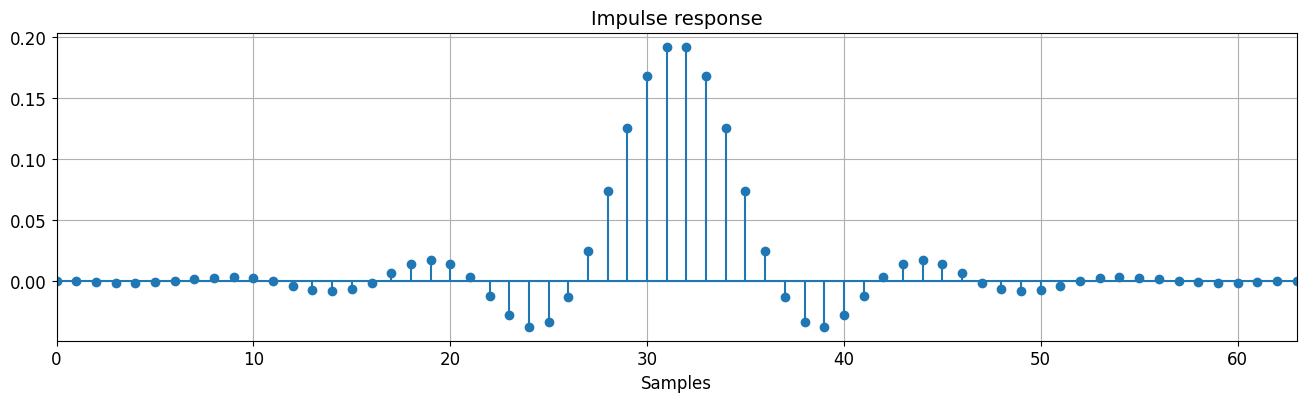

In [ ]:
# Panjang filter dan jumlah titik
N = 100

# List nilai frekuensi (0 hingga 1) sepanjang N
lst_freqs = np.linspace(0, 1, N)

# Inisialisasi list nilai gain, dengan 20 nilai pertama diatur menjadi 1
lst_gain = np.zeros(N)
lst_gain[0:20] = 1

# Jumlah taps filter FIR
NFIR = 64

# Membuat filter FIR dengan spesifikasi frekuensi dan gain yang diberikan
taps = firwin2(NFIR, lst_freqs, lst_gain)

# Membuat plot untuk menampilkan respons impuls dari filter FIR
plt.figure(figsize=(16, 4), dpi=100)
plt.title('Impulse response')
plt.stem(taps, use_line_collection=True, basefmt='C0')
plt.xlim([0, NFIR-1])
plt.xlabel('Samples')
plt.grid(True)

# Menampilkan plot
plt.show()

Gambar tersebut menunjukkan respons impuls dari suatu sistem. Dalam konteks pemrosesan sinyal, respons impuls menggambarkan bagaimana sebuah sistem merespons terhadap input sinyal yang sangat singkat (impuls).

Puncak Utama: Terdapat beberapa puncak utama di sekitar sampel ke-30. Ini menunjukkan bahwa sistem memiliki respons yang signifikan terhadap impuls pada sampel-sampel ini.


Nilai Negatif dan Positif: Terdapat nilai-nilai negatif dan positif di sekitar pusat impuls, menunjukkan adanya karakteristik osilasi atau peredaman dalam respons sistem.


Perilaku Mendekati Nol: Setelah sekitar sampel ke-40, respons sistem tampak mulai mendekati nol, menunjukkan bahwa efek dari impuls mulai mereda dan sistem kembali ke kondisi stabil.

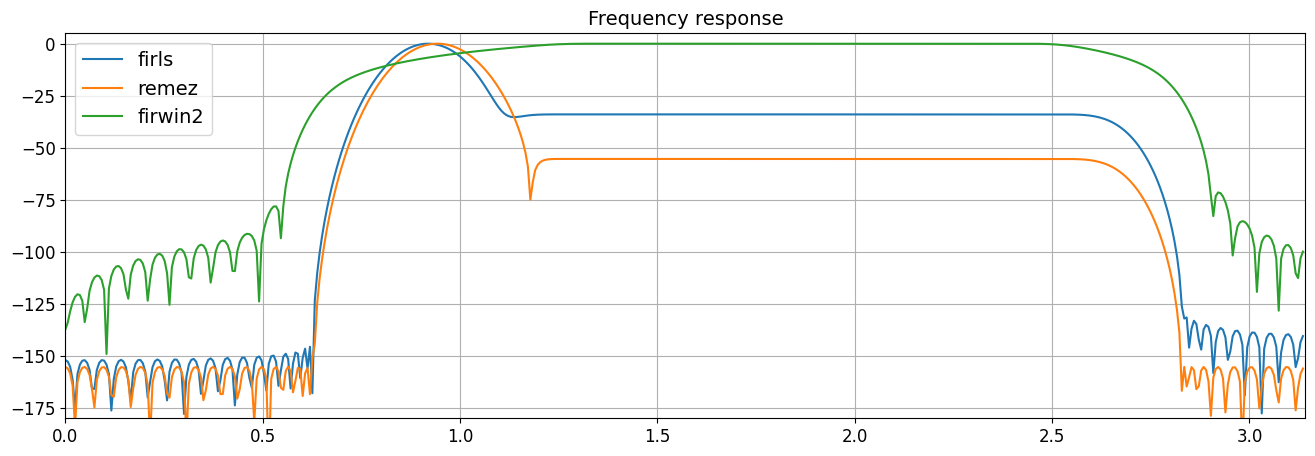

In [ ]:
# Input parameters untuk desain filter
fs = 10           # Frekuensi sampling
N = 117           # Panjang filter
desired = (0, 0, 1, 1, 0, 0)   # Respon yang diinginkan pada setiap band
bands = (0, 1, 2, 4, 4.5, 5)   # Batas-batas frekuensi

# Desain FIR filters menggunakan metode firls, remez, dan firwin2
fir_firls = firls(N, bands, desired, fs=fs)     # Metode firls
fir_remez = remez(N, bands, desired[::2], fs=fs) # Metode remez
fir_firwin2 = firwin2(N, bands, desired, fs=fs)  # Metode firwin2

# Plot hasil dan hitung FFTs
plt.figure(figsize=(16, 5))
plt.title('Frequency response')  # Judul plot
for fir in (fir_firls, fir_remez, fir_firwin2):  # Loop melalui setiap filter FIR
    freq, resp = freqz(fir)  # Hitung respon frekuensi dari filter
    resp = np.abs(resp)  # Ambil nilai magnitudo respon
    resp /= np.max(resp) + 10**(-15)  # Normalisasi respon agar nilainya antara 0 dan 1
    plt.plot(freq, 20*np.log10(resp))  # Plot respon frekuensi dalam dB
plt.xlim([0, np.pi])  # Batasan sumbu x
plt.ylim([-180, 5])   # Batasan sumbu y
plt.legend(['firls', 'remez', 'firwin2'], loc ='upper left')  # Tambahkan legenda
plt.grid(True)  # Tambahkan grid pada plot

# Tampilkan plot
plt.show()

Gambar tersebut menunjukkan respons frekuensi dari tiga filter digital berbeda yang dirancang menggunakan metode yang berbeda: firls, remez, dan firwin2. Respons frekuensi menggambarkan bagaimana filter memodifikasi amplitudo sinyal pada berbagai frekuensi.

Passband dan Stopband: Ketiga filter memiliki passband (rentang frekuensi di mana sinyal diteruskan dengan sedikit atau tanpa peredaman) dan stopband (rentang frekuensi di mana sinyal sangat diredam).


firls dan remez memiliki transisi yang lebih tajam antara passband dan stopband dibandingkan firwin2.
firwin2 memiliki transisi yang lebih gradual dan passband yang lebih lebar.


Ripples:
firls dan remez menunjukkan riak dalam stopband mereka, yang merupakan karakteristik umum dari filter finite impulse response (FIR) yang dirancang dengan metode optimalisasi.
remez cenderung memiliki riak yang lebih kecil dalam passband, yang menunjukkan desain filter dengan riak yang lebih seragam (equiripple).


Peredaman:
Peredaman dalam stopband terlihat sangat kuat untuk semua filter, mencapai lebih dari -100 dB.
remez menunjukkan sedikit lebih banyak peredaman di stopband dibandingkan dengan firls dan firwin2.

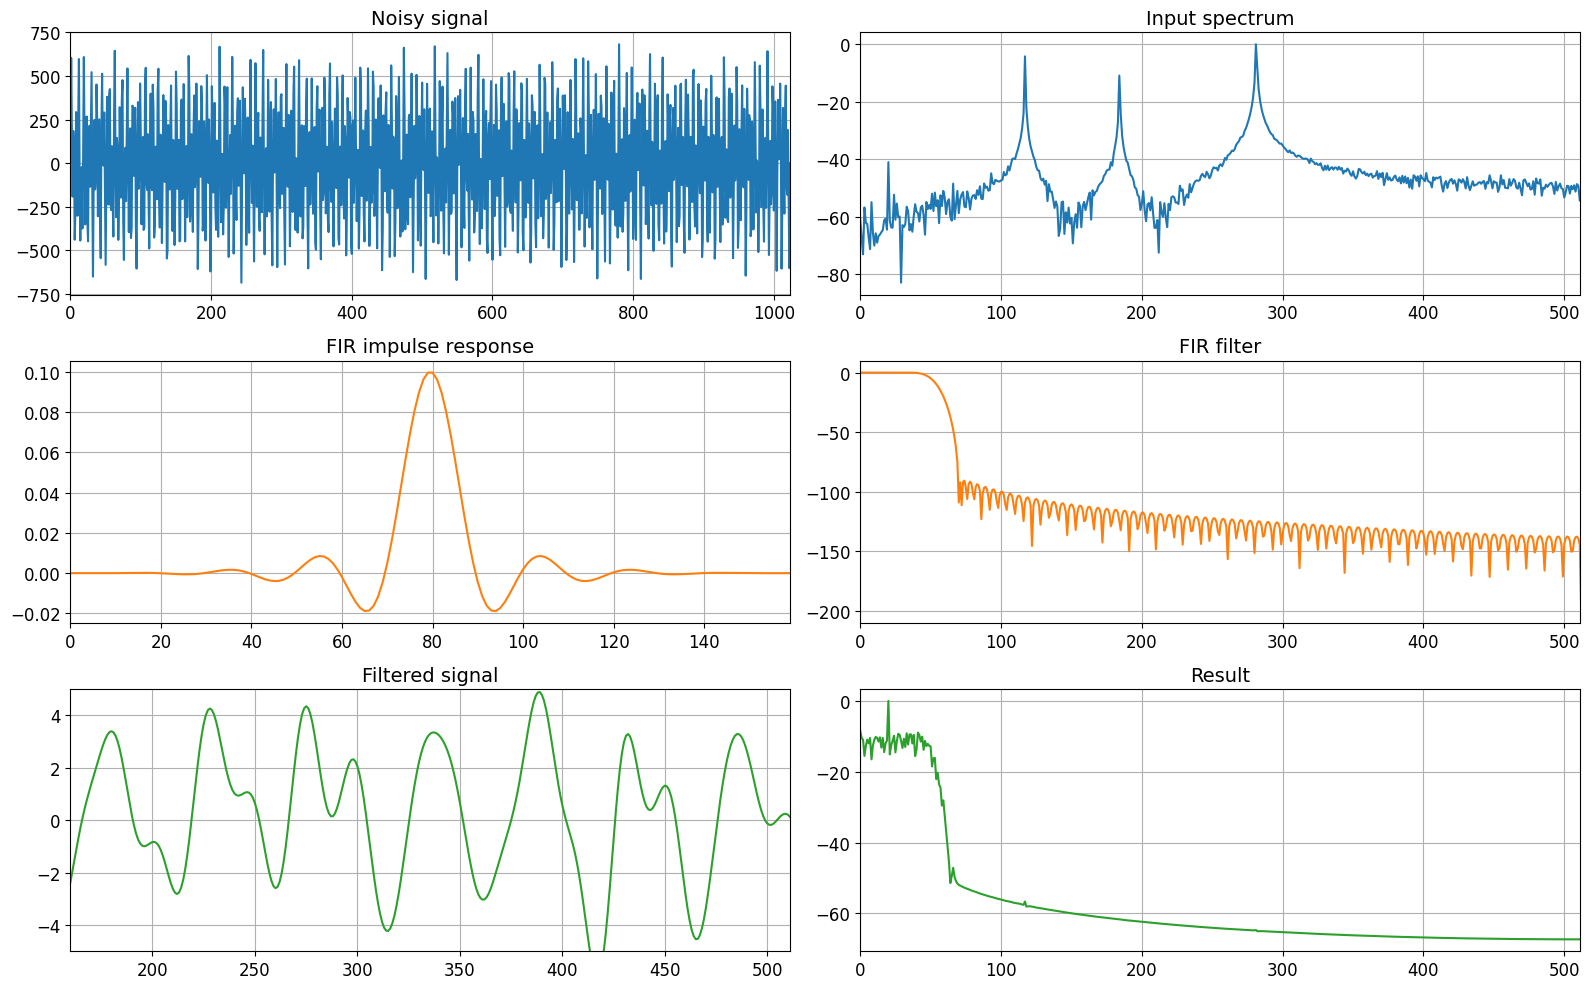

In [ ]:
N = 1024  # Jumlah titik dalam sinyal

# Generate input signal
t = np.linspace(0, 1, N, endpoint=True)  # Generate time axis
x = 3*np.cos(2*np.pi*20*t) + 210*np.sin(2*np.pi*117*t) + 100*np.sin(2*np.pi*184*t) + 380*np.sin(2*np.pi*281*t)

# Add some white noise
np.random.seed(1)
xn = x + 5*np.random.randn(N)

# Kaiser FIR filter
taps = 160  # Jumlah taps filter
h = firwin(taps, 0.1, window=('kaiser', 9))  # Desain filter FIR menggunakan metode Kaiser
y = lfilter(h, 1, xn)  # Filtering sinyal input dengan filter FIR yang telah dibuat

# List of input signals
lst_sig = [xn, h, y]  # Daftar sinyal input, filter FIR, dan sinyal hasil filtering

sig_titles = ['Noisy signal', 'FIR impulse response', 'Filtered signal']  # Judul untuk plot sinyal
fft_titles = ['Input spectrum', 'FIR filter', 'Result']  # Judul untuk plot spektrum FFT

plt.figure(figsize=(16, 10))
for i in range(3):
    # Calculate FFTs
    clc_fft = np.abs(fft(lst_sig[i], N))  # Hitung FFT dari setiap sinyal
    clc_fft = 20*np.log10(10e-11+clc_fft/np.max(clc_fft))  # Konversi menjadi skala log dB

    # Plot signals
    plt.subplot(3, 2, 2*i+1)
    plt.plot(lst_sig[i], color='C'+str(i))  # Plot sinyal dalam domain waktu
    plt.title(sig_titles[i])  # Judul plot
    if (i == 2):
        plt.ylim([-5, 5])  # Batasan sumbu y untuk sinyal hasil filtering
        plt.xlim([taps, lst_sig[i].size//2-1])  # Batasan sumbu x untuk sinyal hasil filtering
    else:
        plt.xlim([0, lst_sig[i].size-1])  # Batasan sumbu x untuk sinyal input dan filter FIR
    plt.grid(True)  # Tampilkan grid pada plot

    # Plot FFTs
    plt.subplot(3, 2, 2*(i+1))
    plt.plot(clc_fft, color='C'+str(i))  # Plot spektrum FFT
    plt.title(fft_titles[i])  # Judul plot spektrum FFT
    plt.xlim([0, N//2-1])  # Batasan sumbu x untuk spektrum FFT
    plt.grid(True)  # Tampilkan grid pada plot

plt.tight_layout()  # Menyesuaikan layout plot agar lebih rapi

Gambar tersebut menampilkan serangkaian subplot yang menggambarkan proses pemfilteran sinyal menggunakan filter FIR (Finite Impulse Response). Berikut adalah penjelasan untuk masing-masing subplot:

1. Noisy Signal (Sinyal Berisik)
Lokasi: Kiri atas
Penjelasan: Ini adalah sinyal asli yang mengandung banyak kebisingan (noise). Sinyal ini mungkin terdiri dari komponen frekuensi yang diinginkan dan komponen frekuensi yang tidak diinginkan (noise).
2. Input Spectrum (Spektrum Masukan)
Lokasi: Kanan atas
Penjelasan: Ini adalah spektrum frekuensi dari sinyal berisik yang ditampilkan pada subplot kiri atas. Sumbu horizontal menunjukkan frekuensi, sementara sumbu vertikal menunjukkan amplitudo dalam domain frekuensi. Kita dapat melihat beberapa puncak yang menunjukkan frekuensi dominan dalam sinyal tersebut.
3. FIR Impulse Response (Respons Impuls FIR)
Lokasi: Kiri tengah
Penjelasan: Ini adalah respons impuls dari filter FIR yang digunakan untuk memfilter sinyal. Respons impuls menunjukkan bagaimana filter merespons terhadap sinyal input yang singkat (impuls). Sumbu horizontal adalah indeks sampel, dan sumbu vertikal adalah amplitudo respons impuls.
4. FIR Filter
Lokasi: Kanan tengah
Penjelasan: Ini adalah respons frekuensi dari filter FIR yang ditunjukkan pada subplot kiri tengah. Sumbu horizontal adalah frekuensi, sementara sumbu vertikal adalah amplitudo dalam desibel (dB). Subplot ini menunjukkan seberapa baik filter menghilangkan frekuensi yang tidak diinginkan dan mempertahankan frekuensi yang diinginkan.
5. Filtered Signal (Sinyal Terfilter)
Lokasi: Kiri bawah
Penjelasan: Ini adalah sinyal yang telah melewati filter FIR. Dibandingkan dengan sinyal berisik pada subplot kiri atas, sinyal terfilter ini memiliki lebih sedikit noise, menunjukkan bahwa filter telah berhasil menghilangkan banyak komponen frekuensi yang tidak diinginkan.
6. Result (Hasil)
Lokasi: Kanan bawah
Penjelasan: Ini adalah spektrum frekuensi dari sinyal yang telah difilter. Subplot ini menunjukkan bagaimana komponen frekuensi dari sinyal terfilter telah berubah dibandingkan dengan spektrum masukan pada subplot kanan atas. Kita dapat melihat bahwa banyak frekuensi noise telah diredam.